In [1]:
#pip install tpot

In [2]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.svm import NuSVC, NuSVR
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix, f1_score, r2_score, mean_absolute_error, root_mean_squared_error


In [3]:
def get_class_metrics(y_true=None, y_pred=None):
    row = [
        accuracy_score(y_true=y_true, y_pred=y_pred), 
        precision_score(y_true=y_true, y_pred=y_pred), 
        recall_score(y_true=y_true, y_pred=y_pred), 
        confusion_matrix(y_true=y_true, y_pred=y_pred), 
        f1_score(y_true=y_true, y_pred=y_pred)
    ]

    return row

In [4]:
df_data = pd.read_csv("../../process_dataset/examples_1009/data_for_training.csv")
df_data

,age,bp_systolic,bp_diastolic,bp_pam,bp_pp,weight kg,height cm,our_imc,sex_1,sex_2,response
0,75.0,108,70,82.666667,38,70.0,160,27.3437,1,0,0
1,66.0,122,72,88.666667,50,52.0,149,23.4224,1,0,0
2,77.0,126,72,90.000000,54,85.0,160,33.2031,1,0,0
3,73.0,130,80,96.666667,50,69.0,151,30.2618,1,0,0
4,65.0,129,73,91.666667,56,58.0,149,26.1249,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
524,78.0,105,56,72.333333,49,82.2,155,34.2144,0,1,1
525,67.0,134,87,102.666667,47,68.1,154,28.7148,0,1,1
526,77.0,141,80,100.333333,61,67.1,152,29.0426,0,1,1
527,61.0,106,58,74.000000,48,58.4,162,22.2527,0,1,1


In [5]:
response = df_data["response"].values
df_values = df_data.drop(columns=["response"]).values

In [6]:
X_train, X_val, y_train, y_val = train_test_split(df_values, response, test_size=0.3, random_state=42)

In [7]:
scaler_instance = StandardScaler()
scaler_instance.fit(X_train)
X_train = scaler_instance.transform(X_train)
X_val = scaler_instance.transform(X_val)

In [8]:
nu_svc_model = NuSVC(
    nu=0.5, 
    kernel='sigmoid',
    gamma='auto', 
    random_state=42,
    probability=True
)

nu_svc_model.fit(X=X_train, y=y_train)

NuSVC(gamma='auto', kernel='sigmoid', probability=True, random_state=42)

In [9]:
predictions = nu_svc_model.predict(X_val)
predictions

array([0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0])

In [10]:
predict_proba = nu_svc_model.predict_proba(X_val)

df_predictions = pd.DataFrame(data=predict_proba, columns=["p0", "p1"])
df_predictions["prediction"] = predictions
df_predictions

,p0,p1,prediction
0,0.448488,0.551512,0
1,0.453070,0.546930,0
2,0.445591,0.554409,1
3,0.440469,0.559531,1
4,0.434722,0.565278,1
...,...,...,...
154,0.454135,0.545865,0
155,0.479342,0.520658,0
156,0.465055,0.534945,0
157,0.463621,0.536379,0


In [11]:
df_predictions.to_csv("demo_proba.csv", index=False)

In [12]:
get_class_metrics(y_pred=predictions, y_true=y_val)

[0.46540880503144655,
 np.float64(0.4782608695652174),
 np.float64(0.4024390243902439),
 array([[41, 36],
        [49, 33]]),
 np.float64(0.4370860927152318)]

In [13]:
df_predictions["prediction"].value_counts()

prediction
0    90
1    69
Name: count, dtype: int64

In [14]:
from sklearn.metrics import RocCurveDisplay

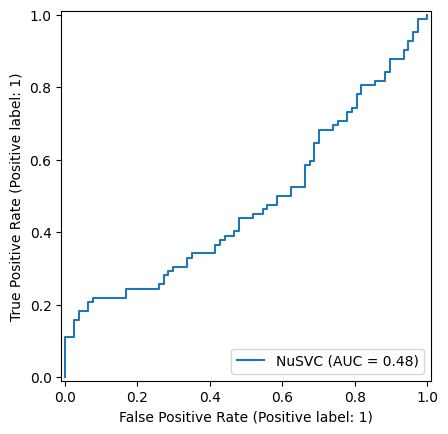

In [15]:
RocCurveDisplay.from_estimator(nu_svc_model, X_val, y_val)

In [16]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_validate

In [17]:
scores = cross_val_score(nu_svc_model, X_train, y_train, cv=10, scoring='recall')
scores.mean()

np.float64(0.43833333333333335)

In [18]:
scores = cross_validate(nu_svc_model, X_train, y_train, cv=10, scoring=['recall', 'f1'])
scores

{'fit_time': array([0.03275871, 0.03341222, 0.02505374, 0.02521324, 0.02592373,
        0.02843046, 0.03174686, 0.03425312, 0.03025198, 0.03712702]),
 'score_time': array([0.00605583, 0.00350571, 0.00434542, 0.00561094, 0.0050714 ,
        0.0037837 , 0.00630379, 0.00503016, 0.00719357, 0.00742888]),
 'test_recall': array([0.42857143, 0.42857143, 0.47619048, 0.45      , 0.35      ,
        0.35      , 0.55      , 0.45      , 0.45      , 0.45      ]),
 'test_f1': array([0.51428571, 0.46153846, 0.5       , 0.48648649, 0.38888889,
        0.4516129 , 0.52380952, 0.47368421, 0.47368421, 0.52941176])}

In [19]:
nu_svc_model.score(X_val, y_val)

0.46540880503144655

In [20]:
scores['test_f1'].mean()

np.float64(0.4803402163993395)

In [21]:
from tpot import TPOTClassifier

/home/david/miniconda3/envs/develop/lib/python3.12/site-packages/tpot/builtins/__init__.py:36: UserWarning: Warning: optional dependency `torch` is not available. - skipping import of NN models.
  warnings.warn("Warning: optional dependency `torch` is not available. - skipping import of NN models.")


In [22]:
#tpot = TPOTClassifier(verbosity=2, max_time_mins=2)
#tpot.fit(X_train, y_train)
#print(tpot.score(X_val, y_val))

In [23]:
#tpot.export('tpot_demo.py')

In [24]:
import optuna

In [29]:
def select_algorithm(trial):
    options_nu = trial.suggest_float("nu", 0.1, 0.6)
    options_kernel = trial.suggest_categorical("kernel", ['linear', 'poly', 'rbf', 'sigmoid'])
    options_gamma = trial.suggest_categorical("gamma", ['auto', 'scale'])
    options_dfs = trial.suggest_categorical("decision_function_shape", ['ovr', 'ovo'])

    model = NuSVC(
        gamma=options_gamma,
        kernel=options_kernel,
        nu=options_nu,
        decision_function_shape= options_dfs,
        probability=True,
        random_state=42
    )

    return model

In [26]:
metrics_list = ["accuracy", "recall", "precision", "f1"]

In [35]:
def objective(trial):
    classifier_obj = select_algorithm(trial)
    scores = cross_validate(classifier_obj, X_train, y_train, cv=5, scoring=metrics_list)
    return scores["test_precision"].mean() #puede ser recall

In [36]:
trials = 100

algorithm = "NuSVC"

study = optuna.create_study(directions=["maximize"])
study.optimize(objective, n_trials=trials)
model = eval(f"{algorithm}(**study.best_params)")
model.fit(X_train, y_train)
response_cv = cross_validate(model, X_train, y_train, cv=5,
                                    scoring=["accuracy", "precision", "f1", "recall"])

[I 2024-09-27 21:28:12,222] A new study created in memory with name: no-name-34f97091-c176-4432-83c0-c4d14a0c0b02
[I 2024-09-27 21:28:12,430] Trial 0 finished with value: 0.5621017211714886 and parameters: {'nu': 0.43168665543731755, 'kernel': 'rbf', 'gamma': 'scale', 'decision_function_shape': 'ovo'}. Best is trial 0 with value: 0.5621017211714886.
[I 2024-09-27 21:28:13,322] Trial 1 finished with value: 0.5616996661289717 and parameters: {'nu': 0.3203473399596335, 'kernel': 'poly', 'gamma': 'scale', 'decision_function_shape': 'ovr'}. Best is trial 0 with value: 0.5621017211714886.
[I 2024-09-27 21:28:13,437] Trial 2 finished with value: 0.5755824013261084 and parameters: {'nu': 0.557505853731974, 'kernel': 'linear', 'gamma': 'auto', 'decision_function_shape': 'ovr'}. Best is trial 2 with value: 0.5755824013261084.
[I 2024-09-27 21:28:13,640] Trial 3 finished with value: 0.5464669317610495 and parameters: {'nu': 0.5681245453777117, 'kernel': 'sigmoid', 'gamma': 'scale', 'decision_func

In [37]:
import numpy as np

y_pred = model.predict(X_val)
    
cv_accuracy = np.mean(response_cv["test_accuracy"])
cv_precision = np.mean(response_cv["test_precision"])
cv_f1 = np.mean(response_cv["test_f1"])
cv_recall = np.mean(response_cv["test_recall"])

row_training = [cv_accuracy, cv_precision, cv_f1, cv_recall]
get_class_metrics(y_pred=y_pred, y_true=y_val)

[0.5157232704402516,
 np.float64(0.5257731958762887),
 np.float64(0.6219512195121951),
 array([[31, 46],
        [31, 51]]),
 np.float64(0.5698324022346368)]

In [38]:
row_training

[np.float64(0.5675675675675677),
 np.float64(0.630603686127359),
 np.float64(0.5869079959486464),
 np.float64(0.556829268292683)]

In [39]:
str(study.best_params)

"{'nu': 0.5487440686800983, 'kernel': 'linear', 'gamma': 'auto', 'decision_function_shape': 'ovo'}"